## Phase 3 Project Submission

- Student Name: Tai Ngoc Bui
- Student Pace: Flex
- Scheduled Project Review: June 20th, 2024
- Instructor Name: Morgan Jones

### 1. Business Understanding

This project focuses on developing a robust and accurate predictive model to classify whether a customer will "soon" stop doing business with SyriaTel. This model should use recall rate as the main metric to ensure the model effectively identifies the most potential churners. The reason I use recall as the main metric here is Syria's business case should avoid minimize the number of customers who decide to churn but mistakenly labelled by the model as non-churners.

Besides building an effective model, this project also recommend the most important features to the SyrialTel team. These features will help stakeholders to implement targeted retention strategies to reduce customer attrition, thereby enhancing customer satisfaction and loyalty, and ultimately increasing revenue.



### 2. Data Understanding

This public dataset is provided by the Kaggle community. It contains 20 predictor variables mostly about customer usage patterns. 

Summary of Features in the Dataset
- state: the state the customer lives in
- account length: the number of days the customer has had an account
- area code: the area code of the customer
- phone number: the phone number of the customer
- international plan: true if the customer has the international plan, otherwise false
- voice mail plan: true if the customer has the voice mail plan, otherwise false
- number vmail messages: the number of voicemails the customer has sent
- total day minutes: total number of minutes the customer has been in calls during the day
- total day calls: total number of calls the user has done during the day
- total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
- total eve minutes: total number of minutes the customer has been in calls during the evening
- total eve calls: total number of calls the customer has done during the evening
- total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
- total night minutes: total number of minutes the customer has been in calls during the night
- total night calls: total number of calls the customer has done during the night
- total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
- total intl minutes: total number of minutes the user has been in international calls
- total intl calls: total number of international calls the customer has done
- total intl charge: total amount of money the customer was charged by the Telecom company for international calls
- customer service calls: number of calls the customer has made to customer service
- churn: true if the customer terminated their contract, otherwise false

### 3. Data Preparation

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, auc

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### a. Load Data

In [2]:
df = pd.read_csv('data/Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### b. Exploratory Data Analysis

In [3]:
#Check the size of the dataframe
df.shape

(3333, 21)

In [4]:
#Statistical description of Numeric Features in dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#Display data types and number of Null in each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Check for duplicated rows
df.duplicated().sum()

0

False    2850
True      483
Name: churn, dtype: int64
False    0.855086
True     0.144914
Name: churn, dtype: float64


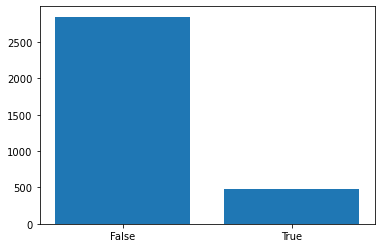

In [7]:
# Analyse the imbalance of dependent variable (Target column)
target = df.churn.value_counts()
print(target)
print(df.churn.value_counts(normalize = True))
plt.bar(target.index, target.values, tick_label = target.index);

There are 3333 records in this dataset, out of which 483 customers are churners and the remaining 2850 are non-churners. Thus, the ratio of churners in this dataset is 14%. The data is clean overall with no duplicated row or Nan values.

#### c. Categorical Features Analysis

Phone number feature is irrelevant as the churn target should not be impacted by customers' phone numbers. Thus, I will drop phone numbers out of list of features.
On the other hand, although area code is numeric feature in the dataframe, it should be converted to categorical for a more convenient preprocessing process later.

In [8]:
df.drop('phone number', axis = 1, inplace = True)
df['area code'] = df['area code'].apply(str)

In [9]:
#Select features with categorical values
cat_features = df.select_dtypes("object").columns
df[cat_features].nunique()

state                 51
area code              3
international plan     2
voice mail plan        2
dtype: int64

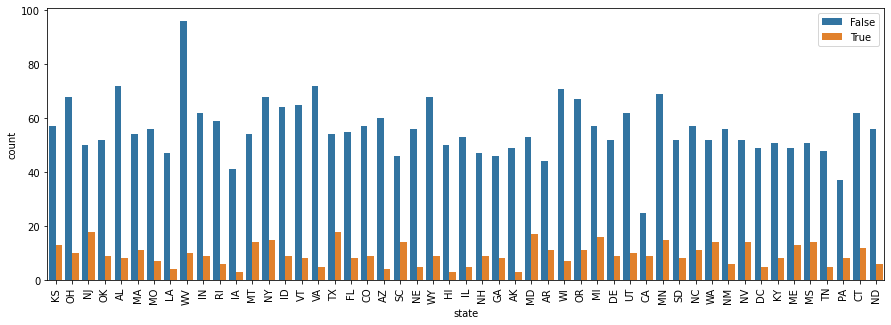

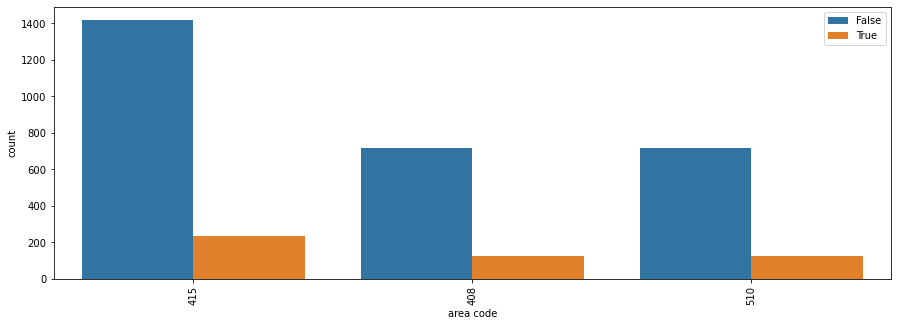

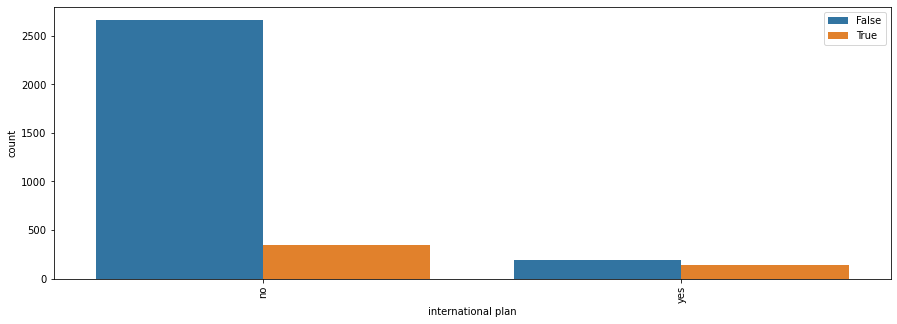

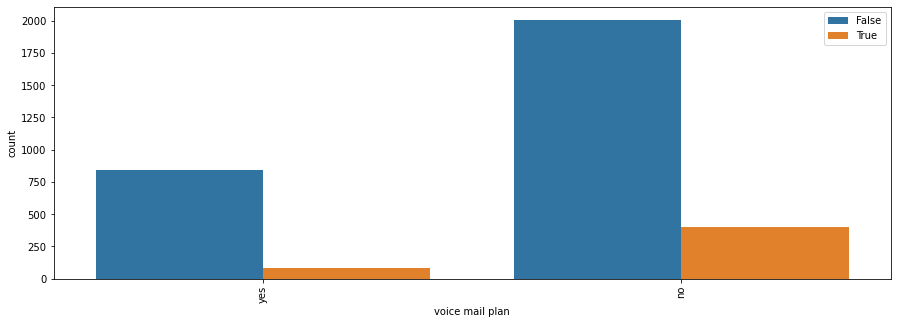

In [10]:
for i in cat_features:
    plt.figure(figsize=(15,5))
    sns.countplot(x=i, hue="churn", data=df)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

#### d. Numerical Features Analysis

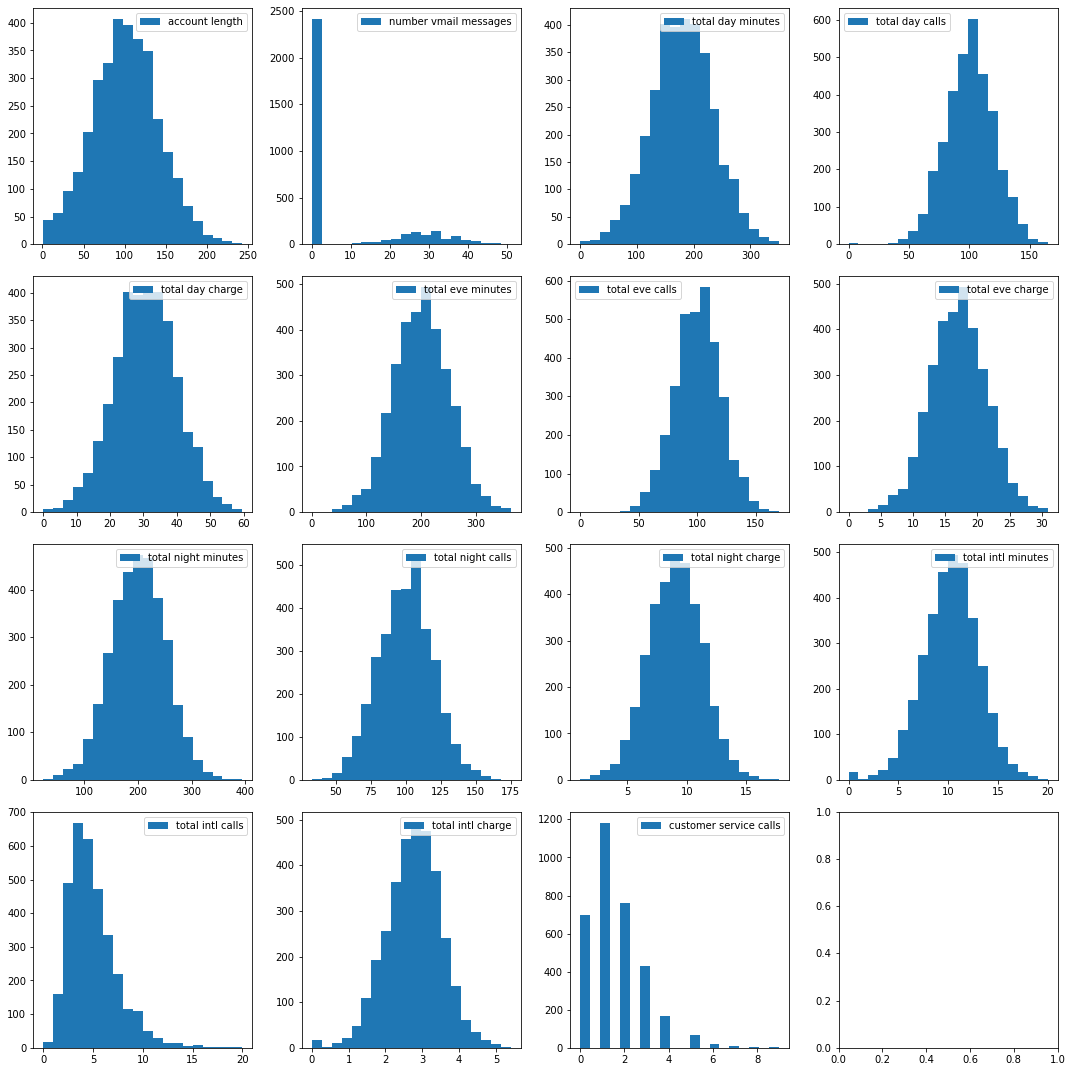

In [11]:
#Select features with numeric values
numeric_features = df.select_dtypes('number').columns

fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (15,15))
for i in range(len(numeric_features)):
    col = i%4
    row = i//4
    ax[row][col].hist(df[numeric_features[i]], label = numeric_features[i], bins = 20)
    ax[row][col].legend()
plt.tight_layout()

- For the distribution of the numeric features, all features except for number of voice mail messages and customer service calls are normally distributed.
- Although total international call is normally distributed, it seems to be skewed with a right tail.

Next, I will investigate the correlations among numerical features.

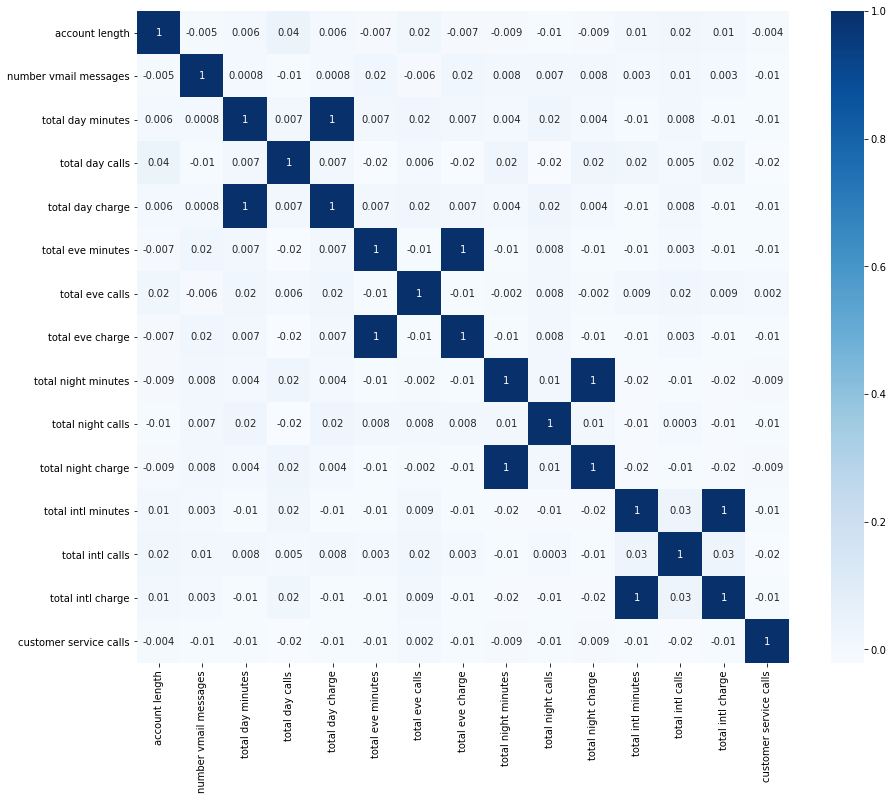

In [12]:
corr_mat = df[numeric_features].corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Most of the numerical features are not correlated however some do share a perfect correlation. It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used. The perfect correlation of 1 indicates the presence of perfect multicollinearity.
- Total day charge and total day minutes features are fully positively correlated.
- Total eve charge and total eve minutes features are fully positively correlated.
- Total night charge and total night minutes features are fully positively correlated.
- Total int charge and total int minutes features are fully positively correlated.

Next, I will drop numerical features with correlation over 0.9 to reduce multicollinearity

In [13]:
print(f"The original dataframe has {df.shape[1]} columns.")
# Calculate the correlation matrix and take the absolute value
corr_matrix = df[numeric_features].corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print(f"The reduced dataframe has {reduced_df.shape[1]} columns.")
print(f"The remaining columns are: {reduced_df.columns.values}")

The original dataframe has 20 columns.
The reduced dataframe has 16 columns.
The remaining columns are: ['state' 'account length' 'area code' 'international plan'
 'voice mail plan' 'number vmail messages' 'total day calls'
 'total day charge' 'total eve calls' 'total eve charge'
 'total night calls' 'total night charge' 'total intl calls'
 'total intl charge' 'customer service calls' 'churn']


Finally, I want to check the significance of outliers in each of the numerical features using box plots. 

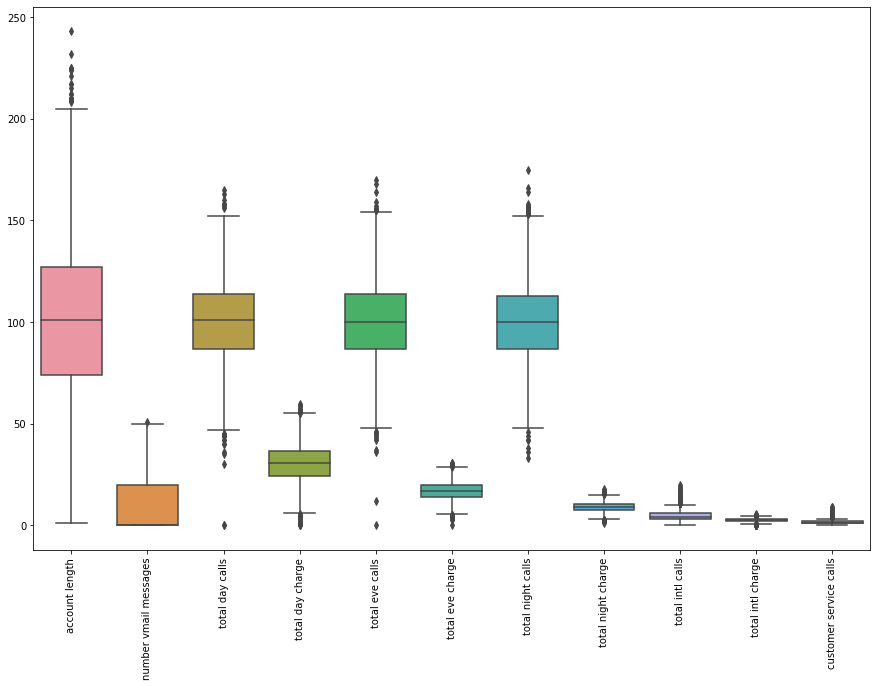

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = reduced_df[reduced_df.select_dtypes('number').columns])
plt.xticks(rotation=90)
plt.show();

As we can see, there are a lot of outliers. Above the box and upper fence are some points showing outliers. Given our numerical features are almost normally distributed, I will apply StandardScaler to normalize the data and reduce outliers problem in the dataset.

### 4. Preprocessing

#### a. Process Categorical Features

Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [15]:
# Create X_train_cat which contains only the categorical variables
cat_columns = reduced_df.select_dtypes('object').columns

#initialize an OneHotEncoder object, then fit_transform categorical features
ohe = OneHotEncoder(drop='first', sparse=False)
cat_ohe = ohe.fit_transform(reduced_df.loc[:, cat_columns])
columns_ = list()
for c,cat in zip(cat_columns, ohe.categories_):
    for i in cat[1:]:
        columns_.append(f"{c}_{i}")

#create a dataframe containing one-hot encoded categorical features and concatenate it back to original dataset
reduced_df_ohe = pd.DataFrame(cat_ohe, index=reduced_df.index, columns = columns_)
reduced_df = pd.concat([reduced_df.drop(cat_columns, axis = 1), reduced_df_ohe], axis = 1)

#### b. Splitting Train vs. Test

Numerical data preparations will happen after the split to avoid data leakage. The general idea is that the treatment of the test data should be as similar as possible to how genuinely unknown data should be treated. And genuinely unknown data would not have been there at the time of fitting the scikit-learn transformers, just like it would not have been there at the time of fitting the model! Moreover, the test set is further splitted to be used later as validation for the final model

In [16]:
y = reduced_df[['churn']]
X = reduced_df.drop('churn', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.15)

#### c. Scaling Numerical Features

I will use Standard Normalization method as our features follow normal distribution as shown under exploratory analysis part. By applying the following method, standard deviation issues will be solved. This scaling will only be applied to numerical features.

In [17]:
#Initiate the StandardScaler object
scale = StandardScaler()

# Create X_train_num which contains only the numerical variables
num_columns = X_train.select_dtypes('number').columns[:11]
X_train_num = X_train.loc[:, num_columns]
X_test_num = X_test.loc[:, num_columns]
X_val_num = X_val.loc[:, num_columns]

X_train_scaled = pd.DataFrame(scale.fit_transform(X_train_num), 
                                columns = num_columns, index = X_train.index)
X_test_scaled = pd.DataFrame(scale.fit_transform(X_test_num),
                                columns = num_columns, index = X_test.index)
X_val_scaled = pd.DataFrame(scale.fit_transform(X_val_num),
                               columns = num_columns, index = X_val.index)

In [18]:
X_train_scaled.describe()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
count,2.499000e+03,2.499000e+03,2.499000e+03,2.499000e+03,2.499000e+03,2.499000e+03,2.499000e+03,2.499000e+03,2.499000e+03,2.499000e+03,2.499000e+03
mean,1.990316e-17,3.802925e-17,2.715359e-16,-7.975480e-16,-2.274647e-17,3.866899e-16,2.750901e-16,-1.307922e-16,-1.137323e-17,-1.293705e-16,6.966105e-17
std,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00
min,-2.532169e+00,-5.869505e-01,-5.039941e+00,-3.320764e+00,-5.018141e+00,-3.990444e+00,-3.150583e+00,-3.098318e+00,-1.807053e+00,-3.617722e+00,-1.194074e+00
25%,-7.015958e-01,-5.869505e-01,-6.705089e-01,-6.676689e-01,-6.618241e-01,-6.918196e-01,-7.087270e-01,-6.767150e-01,-5.974568e-01,-6.072398e-01,-4.330460e-01
50%,5.418658e-04,-5.869505e-01,3.261805e-02,1.287770e-03,3.919249e-02,5.697188e-03,3.481037e-03,-1.110265e-02,-1.942582e-01,-1.823249e-02,-4.330460e-01
75%,6.776032e-01,7.964008e-01,6.855216e-01,6.697033e-01,6.901364e-01,6.868841e-01,6.648170e-01,6.764048e-01,6.121391e-01,6.623982e-01,3.279821e-01
max,3.260467e+00,3.126256e+00,2.995796e+00,3.033242e+00,3.193767e+00,3.220340e+00,3.818881e+00,3.820547e+00,6.256920e+00,3.450366e+00,5.655178e+00


Using describe upon this scaled dataframe, we can see that mean is close to 0 and standard deviation is approximately 1.

#### d. Combine Scaled and Encoded Features

In [19]:
X_train = pd.concat([X_train_scaled, X_train.drop(num_columns,axis = 1)], axis = 1)
X_test = pd.concat([X_test_scaled, X_test.drop(num_columns, axis = 1)], axis = 1)
X_val = pd.concat([X_val_scaled, X_val.drop(num_columns, axis = 1)], axis = 1)

#### f. Using SMOTE to reduce Class Imbalance

In [20]:
# Previous original class distribution
print(y_train.value_counts())
synthetic = y_train[y_train.churn == True].sum().values[0]*2
# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE(sampling_strategy = {True:synthetic}).fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(y_train_resampled.value_counts()) 

churn
False    2126
True      373
dtype: int64


churn
False    2126
True      746
dtype: int64


### 5. Logistic Regression

#### a. Create a base model

First I will use Logistic Regression as the first model. Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. It is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.
This method will be used to create a baseline model.

In [21]:
# Object creation, fitting the data & getting predictions 
lr= LogisticRegression(solver = 'liblinear')
lr.fit(X_train_resampled, y_train_resampled) 
y_hat_train = lr.predict(X_train_resampled)
y_hat_test = lr.predict(X_test) 

C:\Users\TaiBui\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [22]:
#Create a function to check recall metrics
def evaluate(y_train, y_hat_train, y_test, y_hat_test):
    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('\n\n')

Training Recall:  0.5067024128686327
Testing Recall:  0.4489795918367347





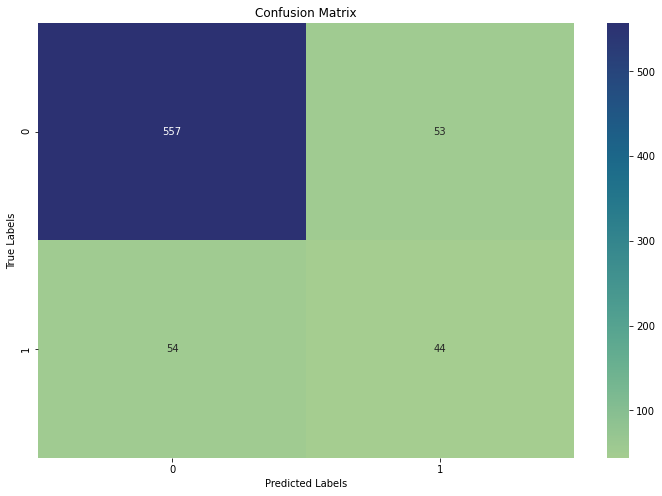

In [23]:
evaluate(y_train_resampled, y_hat_train, y_test, y_hat_test)

#Visualizing Confusion Martrix
cm_lr = confusion_matrix(y_test, y_hat_test)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cm_lr, annot=True, cmap='crest', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

AUC for Logistic Regression: 0.8144697223151555
-------------------------------------------------------


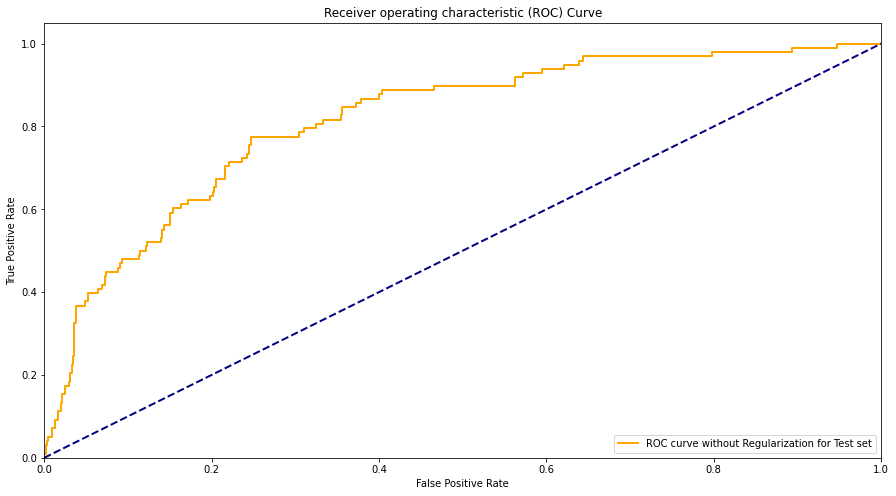

In [24]:
y_score = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC for Logistic Regression: {}'.format(auc(fpr, tpr)))
print('-------------------------------------------------------')

lw = 2
fig, ax = plt.subplots(figsize = (15,8))
plt.plot(fpr, tpr,
         lw=lw,color = 'orange', label='ROC curve without Regularization for Test set')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistic Regression has very low recall rate despite a considerably high ROC AUC metric. As the goal of this project is to develop a model with focusing on maximizing recall rate, I will consider a different model, called Decision Tree Classifier, before deciding if this logistic regression model needs to be tuned with regularization.

### 6. Decision Tree Classifier

- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
- It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
- Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
- The logic behind the decision tree can be easily understood because it shows a tree-like structure.

#### a. Create a base model

In [25]:
dt_base = DecisionTreeClassifier(criterion='entropy')
dt_base.fit(X_train_resampled,y_train_resampled)
y_hat_train_dt = dt_base.predict(X_train_resampled)
y_hat_test_dt = dt_base.predict(X_test) 

Training Recall:  1.0
Testing Recall:  0.7857142857142857





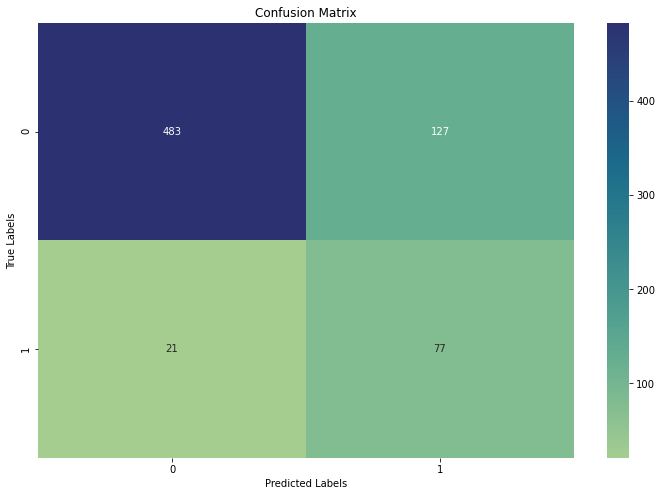

In [26]:
evaluate(y_train_resampled, y_hat_train_dt, y_test, y_hat_test_dt)

#Visualizing Confusion Martrix
cm_lr_dt = confusion_matrix(y_test, y_hat_test_dt)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cm_lr_dt, annot=True, cmap='crest', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

AUC for Decision Tree Classifier: 0.7887587822014052
-------------------------------------------------------


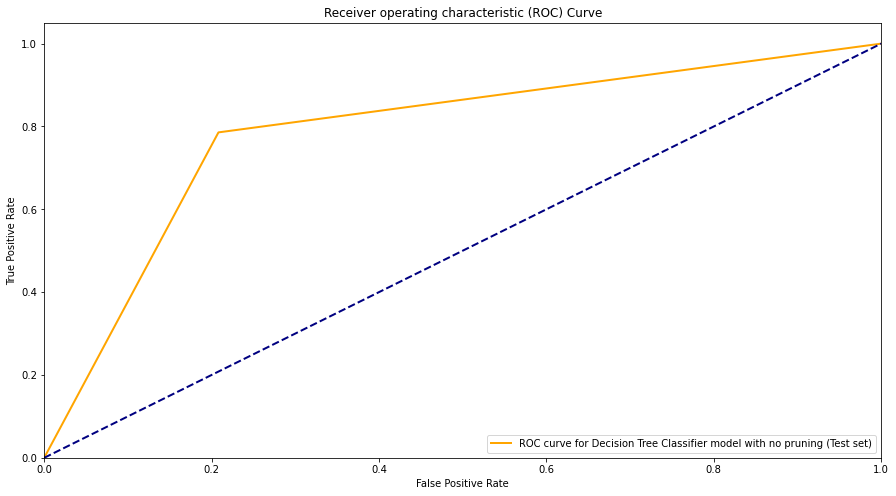

In [27]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_hat_test_dt)
print('AUC for Decision Tree Classifier: {}'.format(auc(fpr_dt, tpr_dt)))
print('-------------------------------------------------------')

lw = 2
fig, ax = plt.subplots(figsize = (15,8))
plt.plot(fpr_dt, tpr_dt,
         lw=lw,color = 'orange', label='ROC curve for Decision Tree Classifier model with no pruning (Test set)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

With decision tree classifier, the recall rate for test set significantly improved compared to logistic regression's. However, the recall rate for training set appears to be 100%, implying the possibility of overfitting with the model. To fix this overfitting problem, different regularization parameters will be used in this decision tree classifier. Hopefully they will reduce overfitting at training set and improve test set's recall rate.

#### b. Maximum Tree Depth

This parameter indicates how deep we want our tree to be. If the tree is too deep, it means we are creating a large number of splits in the parameter space and capturing more information about underlying data. This may result in overfitting as it will lead to learning granular information from given data, which makes it difficult for our model to generalize on unseen data. 

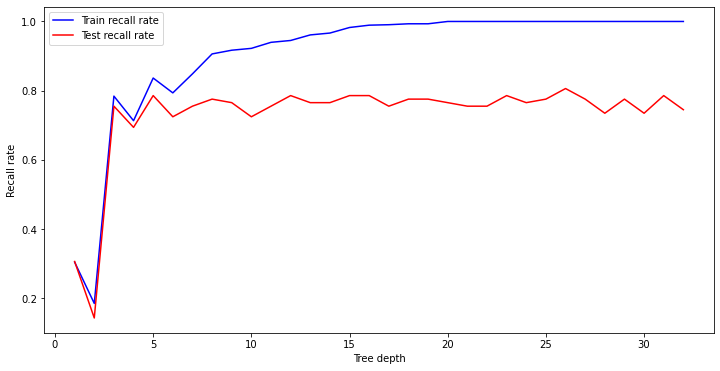

In [28]:
# Identify the optimal tree depth for given data
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt.fit(X_train_resampled,y_train_resampled)
    train_pred = dt.predict(X_train_resampled)
    train_rs = recall_score(y_train_resampled, train_pred)
    train_results.append(train_rs)
    test_pred = dt.predict(X_test)
    test_rs = recall_score(y_test, test_pred)
    test_results.append(test_rs)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train recall rate')
plt.plot(max_depths, test_results, 'r', label='Test recall rate')
plt.ylabel('Recall rate')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

 
- Test's recall rate increases and peaked at depth = 6 - nothing more to learn from deeper trees (some fluctuations, but not stable)
- Test's recall rate rapidly increase up to around depth = 3

#### c. Minimum Sample Split

The hyperparameter min_samples_split is used to set the minimum number of samples required to split an internal node. This can vary between two extremes, i.e., considering only one sample at each node vs. considering all of the samples at each node - for a given attribute.

When we increase this parameter value, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples.

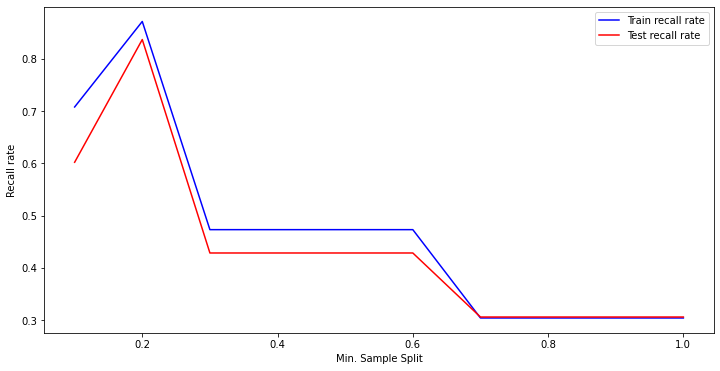

In [29]:
# Identify the optimal minimum sample split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    dt.fit(X_train_resampled,y_train_resampled)
    train_pred = dt.predict(X_train_resampled)
    train_rs = recall_score(y_train_resampled, train_pred)
    train_results.append(train_rs)
    test_pred = dt.predict(X_test)
    test_rs = recall_score(y_test, test_pred)
    test_results.append(test_rs)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train recall rate')
plt.plot(min_samples_splits, test_results, 'r', label='Test recall rate')
plt.ylabel('Recall rate')
plt.xlabel('Min. Sample Split')
plt.legend()
plt.show()

Recall rate for both test and train data peaked at around 0.2 sample split. After setting minimum sample split at 0.2, there is no impact on the test set's recall rate, in fact, it does worsen the recall rate.

#### d.Minimum Sample Leafs

This hyperparameter is used to identify the minimum number of samples that we want a leaf node to contain. When this minimum size is achieved at a node, it does not get split any further. This parameter is similar to min_samples_splits, however, this describes the minimum number of samples at the leaves, the base of the tree.

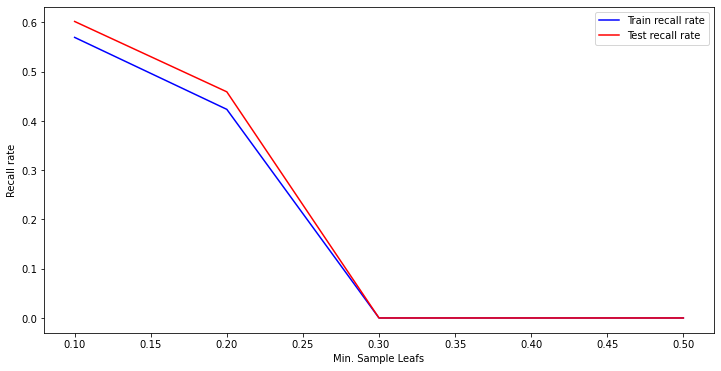

In [30]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dt.fit(X_train_resampled,y_train_resampled)
    train_pred = dt.predict(X_train_resampled)
    train_rs = recall_score(y_train_resampled, train_pred)
    train_results.append(train_rs)
    test_pred = dt.predict(X_test)
    test_rs = recall_score(y_test, test_pred)
    test_results.append(test_rs)

plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train recall rate')
plt.plot(min_samples_leafs, test_results, 'r', label='Test recall rate')
plt.ylabel('Recall rate')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

Recall rate decreases for both test and training sets as I increases minimum sample leafs. It is best to leave this out

#### e. Re-train the classifier with chosen values (max_depth = 3, min_samples_split = 0.2)

Training Recall:  0.871313672922252
Testing Recall:  0.8367346938775511





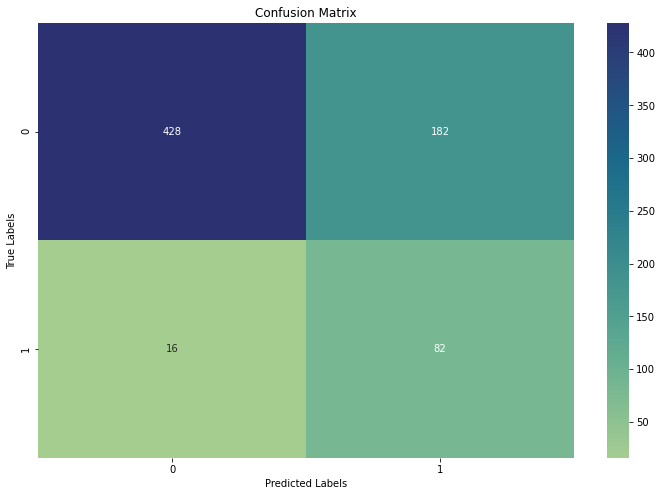

In [31]:
# Train a classifier with optimal values identified above
dt_final = DecisionTreeClassifier(criterion='entropy',
                           max_depth = 3,
                           min_samples_split= 0.2)
dt_final.fit(X_train_resampled,y_train_resampled)
y_hat_train_dt = dt_final.predict(X_train_resampled)
y_pred = dt_final.predict(X_test)

#Get recall rate for train and test set
evaluate(y_train_resampled, y_hat_train_dt, y_test, y_pred)

#Visualizing Confusion Martrix
cm_lr_final = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cm_lr_final, annot=True, cmap='crest', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

With the newly added regularizations including maximum tree depth and minimum sample splits, this regulated decision tree model does show a lower training test recall rate, significantly reduce the earlier problem of overfitting. Furthermore, it also increase the test set's recall rate from 0.7857 to 0.8367

Next, I will apply this final model to the validation set.

#### Running the final model with validation set

Training Recall:  0.871313672922252
Testing Recall:  0.8367346938775511
Validation Recall 0.9166666666666666


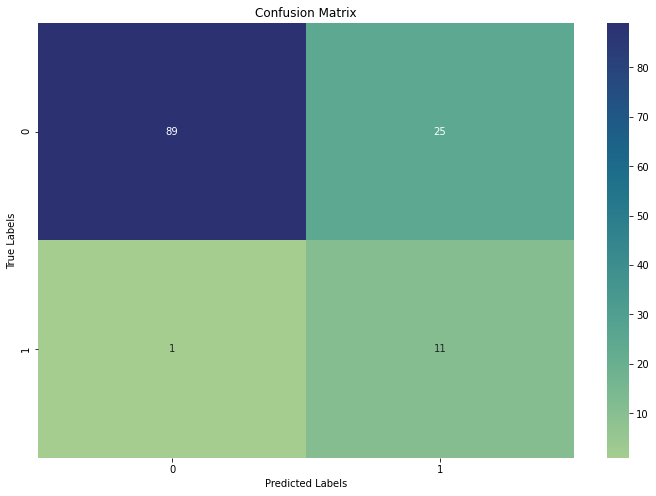

In [32]:
y_val_pred = dt_final.predict(X_val)
print('Training Recall: ', recall_score(y_train_resampled, y_hat_train_dt))
print('Testing Recall: ', recall_score(y_test, y_pred))
print('Validation Recall', recall_score(y_val, y_val_pred))
#Visualizing Confusion Martrix
cm_lr_final_val = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cm_lr_final_val, annot=True, cmap='crest', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

ROC AUC for Decision Tree Classifier with max_depth = 3 and min_sample_splits = 0.2 is 0.8486842105263157
ROC AUC for Decision Tree Classifier with no pruning is 0.8793859649122805
ROC AUC for Logistic Regression with no regularization is 0.6929824561403509
--------------------------------------------------


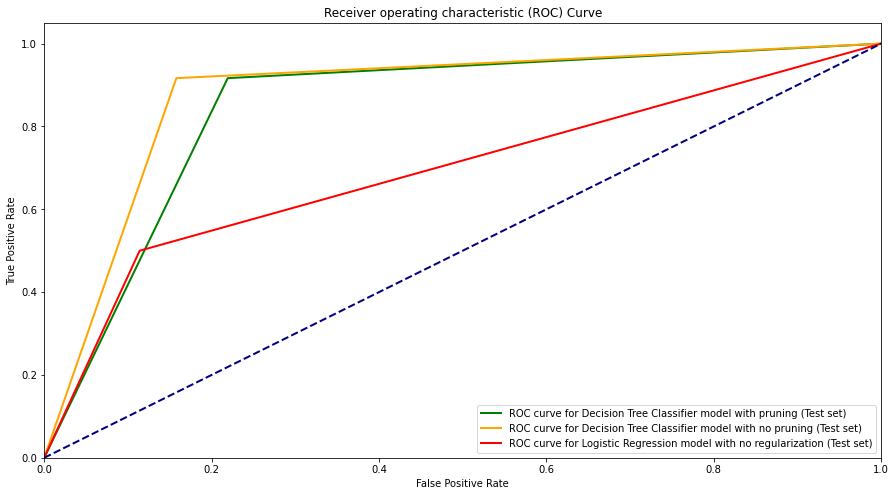

In [33]:
fpr_final, tpr_final, thresholds_final = roc_curve(y_val, y_val_pred)
roc_auc_final = auc(fpr_final, tpr_final)

#Logistic Regression
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_val, lr.predict(X_val))
roc_auc_lg = auc(fpr_lg, tpr_lg)

# No pruning tree
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_val, dt_base.predict(X_val))
roc_auc_tree = auc(fpr_tree, tpr_tree)

print(f"ROC AUC for Decision Tree Classifier with max_depth = 3 and min_sample_splits = 0.2 is {roc_auc_final}")
print(f"ROC AUC for Decision Tree Classifier with no pruning is {auc(fpr_tree, tpr_tree)}")
print(f"ROC AUC for Logistic Regression with no regularization is {roc_auc_lg}")
print('--------------------------------------------------')
lw = 2
fig, ax = plt.subplots(figsize = (15,8))
plt.plot(fpr_final, tpr_final,
         lw=lw,color = 'green', label='ROC curve for Decision Tree Classifier model with pruning (Test set)')
plt.plot(fpr_tree, tpr_tree,
         lw=lw,color = 'orange', label='ROC curve for Decision Tree Classifier model with no pruning (Test set)')
plt.plot(fpr_lg, tpr_lg,
         lw=lw,color = 'red', label='ROC curve for Logistic Regression model with no regularization (Test set)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

By limitting the model's max_depth parameter at 3 and min_samples_split at 0.2, I was able to reduce the problem of overfitting (lowering train set's recall rate). My regression tree model's recall rate for the validation set is 0.9166 despite a slight decrease in ROC AUC compared to base model - an acceptable trade off.

#### f. Features Importance

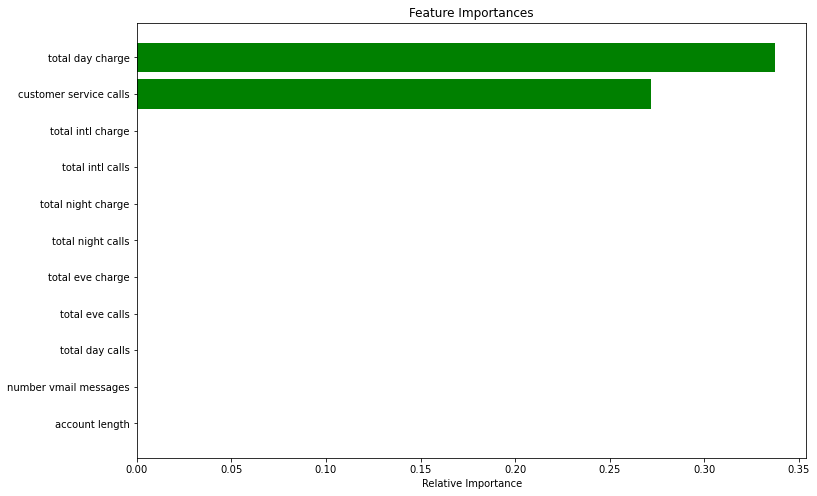

In [39]:
feature_names = list(X_train_resampled.columns)
importances = dt_final.feature_importances_[0:11]
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to the final model for Regression Tree Classifier, the 2 most important features that impact customers' churning rate are:
- total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
- customer service calls: number of calls the customer has made to customer service

Given the importance of these features, I want to recommend our stakeholders at SyriaTel to launch new campaigns to reduce the amount of charge towards customers. On the other hand, it will be beneficial to SyriaTel by focusing on improving customer service team. By hiring more customer service agents to reduce customers' waiting time as well as offering more trainings to the team will definitely reduce churning rate at SyriaTel.

### 7. Summary

Based on our analysis and final model, I want to recommend Regression Tree Classifier with max_depth = 3 and min_samples_split = 0.2 as the final classifying model to SyriaTel organization. Based on our result, this model can achieve 0.836 and 0.916 recall rate for test set and validation set respectively.

Moreover, I also recommend SyriaTel stakeholders to focus their strategies on lower amount charge towards customers during day call as it is an important feature in this model. Launching campaigns to offer discounts for day calls would greatly reduce SyriaTel's churn rate. Furthermore, as customer service calls is another important feature in this model, I suggest SyriaTel to expand their customer service agents to lower customers' waiting time as well as provide extensive trainings to their customer service team. By following these recommendations, SyriaTel should be able to lower its churn rate and increase customers retention.

### 8. Future Works

To better improve the quality of this report, I will extend this project using Random Forest Classifier model and Support Vector Machine model to possibly achieve a better recall rate.
